# Deep Learning - Convolutional Neural Networks

In [2]:
! pip install tensorflow==2.0

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10, mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)

Using TensorFlow backend.


In [4]:
%%time
(x_train, y_train), (x_test, y_test) = mnist.load_data()

CPU times: user 306 ms, sys: 42.2 ms, total: 348 ms
Wall time: 353 ms


In [5]:
s1 = x_train.shape
s2 = x_test.shape
print(f"The mnist data was loaded with {s1[0]} training samples and {s2[0]} testing samples. Each sample is a {s1[1]} x {s1[2]} pixel image.")


The mnist data was loaded with 60000 training samples and 10000 testing samples. Each sample is a 28 x 28 pixel image.


In [6]:
example = x_train[0]
example

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

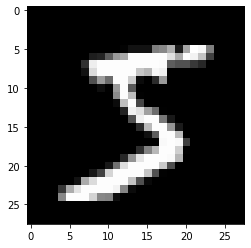

In [7]:
plt.imshow(example, cmap="gray", vmin=0, vmax=255)

In [0]:
def calculate_conv_shape(X, K, padding=0, stride=1):
    """Calculate the shape of the output of a convolution 
    
    Args:
        X (np.array): The input matrix
        K (np.array): The filter matrix
        padding (int, optional): Defaults to 0. The padding dimension
        stride (int, optional): Defaults to 1. The stride of the convolution
    
    Returns:
        tuple: The shape of the convolution output (height followed by width)
    """
    height = int((X.shape[1] - K.shape[1] + 2*padding)/stride + 1)
    width = int((X.shape[0] - K.shape[0] + 2*padding)/stride + 1)
    return (height, width)

In [9]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

calculate_conv_shape(example, sharpen, padding=1)

(28, 28)

In [0]:
ans = calculate_conv_shape(example, sharpen, padding=1)
assert isinstance(ans, tuple)
assert isinstance(ans[0], int)
assert isinstance(ans[1], int)
assert ans == (28, 28)
ans = calculate_conv_shape(example, sharpen, padding=0, stride=2)
assert ans == (13, 13)

To apply a convolution, you can use the [convolve](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.convolve.html) function from scipy. (scipy has already been imported for you above.)

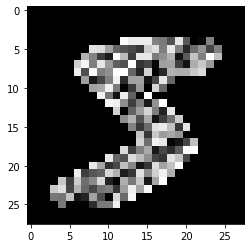

In [11]:
# Apply the sharpen filter to the example and save the output to sharpened_image
# YOUR CODE HERE
from scipy import ndimage
sharpened_image = ndimage.convolve(example, sharpen)


plt.imshow(sharpened_image, cmap="gray", vmin=0, vmax=255)
plt.show()

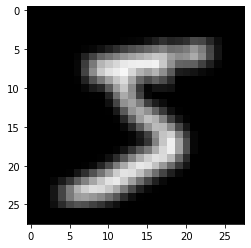

In [12]:

# Apply a filter of your choice (saved to my_filter) and save the output image to filtered_image
# YOUR CODE HERE
my_filter = np.ones((3,3)) * (1/9) 
filtered_image = ndimage.convolve(example, my_filter)

plt.imshow(filtered_image, cmap="gray", vmin=0, vmax=255)
plt.show()

In [0]:
assert sharpened_image.shape == example.shape
assert filtered_image.shape == example.shape
assert my_filter.shape == (3,3)

In [14]:
# Create a simple FFNN model with 2 hidden dense layers and an output layer
# You can choose any number of neurons per Dense layer ex. 100 or 200
# Since the input data is a matrix, you will want to use the Flatten layer 
# Save the Sequential model to simple_model and its layers to simple_layers

# YOUR CODE HERE
simple_layers=[Flatten(), 
               Dense(100, input_dim=784, activation='relu'), 
               Dropout(0.1),
               Dense(100, activation='relu'),
               Dropout(0.1),
               Dense(10, activation="softmax")]

simple_model = Sequential(simple_layers)

simple_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
simple_model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 2.0606 - accuracy: 0.7570
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5848 - accuracy: 0.8589
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4388 - accuracy: 0.8917
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3510 - accuracy: 0.9090
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2985 - accuracy: 0.9214


In [15]:
assert len(simple_layers) == 6
assert isinstance(simple_layers[0], Flatten)
assert isinstance(simple_layers[1], Dense)
assert isinstance(simple_layers[3], Dense)
assert isinstance(simple_layers[5], Dense)
assert isinstance(simple_layers[2], Dropout)
assert isinstance(simple_layers[4], Dropout)

simple_scores = simple_model.evaluate(x_test, y_test)
assert simple_scores[1] > 0.3

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
print(f"\nThe simple model achieves an accuracy of {simple_scores[1]*100:.2f}% on the test data.")


The simple model achieves an accuracy of 93.95% on the test data.


Now we'll create a CNN and see how it compares to our regular FFNN. We'll use [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) for the convolutional layers and [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) for pooling.

For the convolutional layers below, use a `3*3` convolutional filter and be sure to set the padding.

In [17]:
# Create a CNN model with 4 convolutional layers, 2 dense fully connected hidden layers and the output layer
# Use Max pooling after every convolutional layer and use 32, 64, 128, 128 filters respectively
# You will need to flatten the output from the feature learning component to be used in the FFNN
# You can choose any number of neurons per Dense layer ex. 100 or 200
# Save the Sequential model to cnn_model and its layers to cnn_layers

cnn_layers = [Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = "same", activation = "relu", input_shape = (28,28,1)),
              MaxPool2D(pool_size = (2,2), strides = (2,2)),
              Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = "same"),
              MaxPool2D(pool_size = (2,2), strides = (2,2)),
              Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = "same"),
              MaxPool2D((2,2), strides = (2,2)),
              Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = "same"),
              MaxPool2D(pool_size = (2,2)),
              Flatten(),
              Dense(100, activation = "relu"),
              Dense(100, activation = "relu"),
              Dense(10, activation = "softmax")
              ]
cnn_model = Sequential(cnn_layers)

cnn_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train.reshape(-1, 28, 28 ,1), y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.2274 - accuracy: 0.9455
Epoch 2/3
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0761 - accuracy: 0.9778
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0658 - accuracy: 0.9808


In [18]:
assert len(cnn_layers) == 12
assert isinstance(cnn_layers[0], Conv2D)
assert isinstance(cnn_layers[2], Conv2D)
assert isinstance(cnn_layers[4], Conv2D)
assert isinstance(cnn_layers[6], Conv2D)
assert isinstance(cnn_layers[1], MaxPool2D)
assert isinstance(cnn_layers[3], MaxPool2D)
assert isinstance(cnn_layers[5], MaxPool2D)
assert isinstance(cnn_layers[7], MaxPool2D)
assert isinstance(cnn_layers[8], Flatten)
assert isinstance(cnn_layers[9], Dense)
assert isinstance(cnn_layers[10], Dense)
assert isinstance(cnn_layers[11], Dense)

cnn_scores = cnn_model.evaluate(x_test.reshape(-1, 28, 28 ,1), y_test)
assert cnn_scores[1] > 0.9

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

*Optional:* Copy this notebook and add some dropout layers to your CNN and see how that affects your scores.

In [19]:
print(f"\nThe CNN model achieves an accuracy of {cnn_scores[1]*100:.2f}% on the test data.")


The CNN model achieves an accuracy of 98.40% on the test data.


The simple model predicts this image is a 1 and the CNN predicts it is a 1.


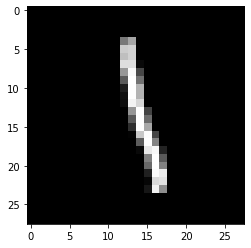

In [20]:
# Change this value to test out some numbers and see how the models perform
i = 189 #245

new_example = x_test[i].astype(float)

simple_new_example = new_example.reshape(-1, 28, 28)
cnn_new_example=new_example.reshape(-1, 28, 28, 1)

simple_predict = simple_model.predict(simple_new_example).argmax()
cnn_predict = cnn_model.predict(cnn_new_example).argmax()

plt.imshow(new_example, cmap="gray", vmin=0, vmax=255)
print(f"The simple model predicts this image is a {simple_predict} and the CNN predicts it is a {cnn_predict}.")

A much more involved optional case for this exercise is to try working with [lime](https://github.com/marcotcr/lime) to understand what the network is learning about each class. I highly recommend using lime for your final projects.

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "I ran into a lot of issues during this exercise that could have been mitigated by clearer dirations in the instructions or by mentioning things to looks out for in class. I still learned a good deal about CNNs however."